In [17]:
import cv2
import os

In [18]:
from PIL import Image

# File Name Cutting & Size Unification

In [50]:
fileList = os.listdir('./realData/')
count = 1
for file in fileList:
    fileNumber = file.split('-')[1]
    img = Image.open('./realData/' + file)
    img_resize = img.resize((256, 256))
    if(file.split('-')[2] == '001.jpg') or (file.split('-')[2] == '01.jpg'):
        count = 1
    img_resize.save('./ImageSizeUnificated/resized.' + fileNumber + '(' + str(count) + ').png')
    count += 1

# -------------------------------------------------------------------------------------------------------

# Image Gray Scaler

In [51]:
fileList = os.listdir('./ImageSizeUnificated/')

In [56]:
for file in fileList:
    fileNumber = file.split('.')[1]
    imageName = './ImageSizeUnificated/resized.' + fileNumber + '.png'
    image = cv2.imread(imageName, cv2.IMREAD_COLOR)
    if image is None:
        print('Could not open or find the Image')
    grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2.imwrite("./grayImages/" + fileNumber + '.png', grayImage)

# -------------------------------------------------------------------------------------------------------

In [57]:
import warnings
warnings.filterwarnings('ignore')

In [58]:
import numpy as np
import pandas as pd
from keras_preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

In [59]:
FAST_RUN = False
IMAGE_WIDTH = 256
IMAGE_HEIGHT = 256
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3

In [61]:
filenames = os.listdir("./grayImages/")
categories = []
for filename in filenames:
    category = filename.split('.')[0][:4]
    categories.append(category)
        
df = pd.DataFrame({
    'filename' : filenames,
    'category' : categories
})

In [62]:
df.sort_values(by='category', ascending=True)

,filename,category
0,3001(1).png,3001
1,3001(2).png,3001
2,3001(3).png,3001
3,3001(4).png,3001
4,3001(5).png,3001
...,...,...
2118,6022(2).png,6022
2117,6022(10).png,6022
2116,6022(1).png,6022
2119,6022(3).png,6022


6013(16).png


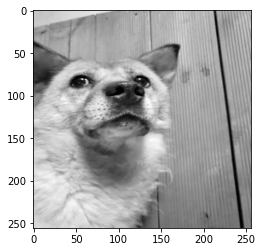

In [63]:
sample = random.choice(filenames)
print(sample)
image = load_img("./grayImages/"+sample)
plt.imshow(image)

# Data Augmentation

num_argumented_images = 1000

file_path = './grayImages/'
file_names = os.listdir(file_path)
total_origin_image_num = len(file_names)

for k in range(0, 10):
    argument_cnt = 1
    for i in range(0, num_argumented_images):
        file_name = file_names[k]

        origin_image_path = './grayImages/' + file_name
        image = Image.open(origin_image_path)
        random_argument = random.randrange(1, 4)

        # 좌우 반전
        if(random_argument == 1):
            inverted_image = image.transpose(Image.FLIP_LEFT_RIGHT)

            inverted_image.save('./testData/'+ str(k+1) + '(' + str(argument_cnt) + ').png')

        # 기울이기
        elif(random_argument == 2):
            rotated_image = image.rotate(random.randrange(-20, 20))

            rotated_image.save('./testData/' + str(k+1) + '(' + str(argument_cnt) + ').png')

        # 노이즈 추가
        elif(random_argument == 3):
            img = cv2.imread(origin_image_path)
            row, col, ch = img.shape
            mean = 0
            var = 0.1
            sigma = var ** 0.5
            gauss = np.random.normal(mean, sigma, (row, col, ch))
            gauss = gauss.reshape(row, col, ch)
            noisy_array = img + gauss
            noisy_image = Image.fromarray(np.uint8(noisy_array)).convert('RGB')

            noisy_image.save('./testData/' + str(k+1) + '(' + str(argument_cnt) + ').png')
        
        argument_cnt += 1

# -------------------------------------------------------------------------------------------------------

# Data Labeling
## -------------------------------------------------------
## train target data

In [77]:
train_target = np.array(df['category'])

In [78]:
train_target

array(['3001', '3001', '3001', ..., '6022', '6022', '6022'], dtype=object)

In [79]:
train_target = train_target.astype('uint8')

In [90]:
train_target

array([185, 185, 185, ..., 134, 134, 134], dtype=uint8)

In [85]:
print(train_target.dtype)
print(type(train_target))
print(train_target.shape)

uint8
<class 'numpy.ndarray'>
(2126,)


## -------------------------------------------------------

## test target data

In [69]:
test_target = np.array(test_target)

In [70]:
test_target = test_target.astype('uint8')

In [93]:
print(test_target.dtype)
print(type(test_target))
print(test_target.shape)

uint8
<class 'numpy.ndarray'>
(10000,)


## -------------------------------------------------------
# train input data

In [23]:
image = np.array(Image.open('./trainData/1(1).png'))

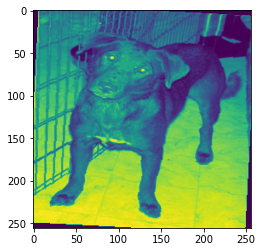

In [24]:
plt.imshow(image)

In [25]:
type(image)

numpy.ndarray

In [11]:
train_input = []

In [ ]:
filenames = os.listdir("./trainData/")
for filename in filenames:
    plt.imshow(np.array(Image.open('./trainData/' + filename)))
#     train_input.append( np.array(Image.open('./trainData/' + filename)) )

In [10]:
train_input = np.array(train_input)

ValueError: could not broadcast input array from shape (256,256,3) into shape (256,256)